In [588]:
Mg = 27000 # Mass of ship
lcg = 8.84 #gravity oordinate of ship
B = 4.27 #Beam
be_ta = 10 #Deadrise angle
U = 20.58 #Ship speed
Fnb = 3.18 # Froude number
p = 1026 #mass density of salt water
zmax_vt = 0.5556 # table 8.3
Cf = 1.78e-3 #frictional force coefficient
delta_cf = 3.7e-4
AHR = 150e-6 #The average hull roughness
Rn = 3.1e8 #Reynolds number
v = 1.19e-6 #kinetic viscosity
t = 0.2

In [589]:
import math
import numpy as np
from scipy.optimize import linearmixing,fsolve,show_options

def lamda_w(a):
    
    return fsolve(lambda x : 0.75 - 1/(5.21*Fnb**2/x**2 + 2.39)-lcg/(x*B),a)

def get_tau(a):
    '''We use equations are shown below
    (9.4) ,(9.5),(9.7)''' 
    global clb,cl0,lamdaw
    lamdaw = lamda_w(a)
    clb = Mg/(0.5*p*(U**2)*(B**2))
    cl0 = fsolve(lambda cl0 : 0.067 - cl0 + 0.0065*be_ta*cl0**0.60,a)
    print('The value of clb,cl0,lamdaw are = ', clb , ',' , cl0 , ',', lamdaw)
    return pow((cl0/(0.012*(lamdaw**0.5)+0.0055*(lamdaw**2.5)/(Fnb**2))),10/11)

tau_value = get_tau(1)
print(tau_value)
xs = (B*be_ta)/(np.pi*tau_value) # equation (9.8)

# xs = 2*B*lamdaw
# The consequence is that the draft of the keel at transom is determinded as following equations :
# D = (2*lamdaw*B - (lamdaw*B - 0.5*xs))*math.sin(tau_value)

Lc = lamdaw*B - 0.5*xs
Lk = 2*lamdaw*B - Lc
D = Lk*np.sin(np.radians(tau_value))


# The wetted area is divided into two parts S1 and S2 those value are calculated following eqs below :
# S1 = (np.tan(np.radians(be_ta))/np.cos(np.radians(be_ta)))*(B**2/(4*(1+zmax_vt)*tau_value))
S1 = (np.tan(np.radians(be_ta))*B**2)/(np.cos(np.radians(be_ta))*4*(1+zmax_vt)*np.radians(tau_value))
# S1 = (tau_value/np.sin(np.radians(be_ta)))*(1+zmax_vt)*xs**2
S2 = B*Lc/np.cos(np.radians(be_ta))
S = S1 + S2 

# Now we get the Viscous Resistance Rv =
Rv = 0.5*p*Cf*S*U**2 + 0.5*p*clb*(B*U)**2*np.radians(tau_value)
# Rt = 0.5*p*U**2*lamdaw*B**2*(Cf-delta_cf)/(np.cos(np.radians(tau_value))*np.cos(np.radians(be_ta))) + Mg*t*9.81*np.radians(tau_value)
Rt = 29603/(1-t)


The value of clb,cl0,lamdaw are =  0.0068155343057433775 , [0.08143438] , [3.42315515]
[2.2126698]


In [613]:
print('xs,Lc,Lk,D,S1,S2,S = ' ,xs,Lc,Lk,D,S1,S2,S)
print('Resistance is shown below : ')
print('Rv and Rt (with propeller) = '  , Rv ,',', Rt )


xs,Lc,Lk,D,S1,S2,S =  [6.14272954] [11.54550771] [17.68823725] [0.68292117] [13.58536029] [50.05983935] [63.64519964]
Resistance is shown below : 
Rv and Rt (with propeller) =  [25657.35154825] , 37003.75


<!-- ![title](images/Planing-craft-configuration-and-coordinate-systems.png) -->
![title](images/Planing-craft-configuration-and-coordinate-systems.png)![title](images/aaa.png)
![title](https://github.com/ghostangeler96/hello/blob/master/Planing-craft-configuration-and-coordinate-systems.png?raw=true)
![title](https://github.com/ghostangeler96/hello/blob/master/aaa.png?raw=true)


In [599]:
fsolve(lambda cl0 : 0.067 - cl0 + 0.0065*be_ta*cl0**0.60,1)

array([0.08143438])

In [600]:
import matplotlib.pyplot as plt
import numpy as np

def f(cl0):
    return 0.0068 - cl0 + 0.0065*be_ta*cl0**0.6
testing = list(-f(np.arange(10)))
print(testing)

type(testing)
    
# plt.plot(np.linspace(-10,10),f(np.linspace(0,10)).append(-f(np.linspace(0,10))))

[-0.0068, 0.9281999999999999, 1.8946784231768241, 2.867543167079435, 3.843869213850385, 4.822475692713755, 5.802739856647071, 6.784283769768457, 7.766856853543008, 8.750282466774975]


list

<function matplotlib.pyplot.show(*args, **kw)>

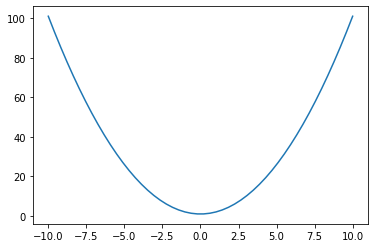

In [593]:
f = lambda x : x**2 +1
plt.plot(np.linspace(-10,10),f(np.linspace(-10,10)))
plt.show

In [594]:
def f(x):
    return pow(x,0.6), x**0.6
print(f(-2))
print(f(2))
type(f(-2))

((-0.4683821777073581+1.4415321174362306j), (-0.4683821777073581+1.4415321174362306j))
(1.515716566510398, 1.515716566510398)


tuple

In [595]:
1.78e-3

0.00178